### Combined script for all conditions

In [1]:
from pathlib import Path
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.transforms import blended_transform_factory
from matplotlib.collections import LineCollection
import seaborn as sns

import trompy as tp
import csv


colors_restricted = "#219C90"
colors_adlib_light = "#9C89B8" 
colors_adlib_dark = "#0059b3"
colors_sucralose = "#af9991"

In [2]:
DATAFOLDER = Path("C:/Data/hislight_pickles/")
FIGSFOLDER = Path("C:/Users/kvo019/OneDrive - UiT Office 365/Pipette 2/People/Linnea/Manuscripts/hislight paper/figures")
STATSFOLDER = Path("C:/Users/kvo019/OneDrive - UiT Office 365/Pipette 2/People/Linnea/Manuscripts/hislight paper/stats")

with open(DATAFOLDER / "restricted_dark.pickle", 'rb') as handle:
    restricted_dark = pickle.load(handle)

with open(DATAFOLDER / "adlib_dark.pickle", 'rb') as handle:
    adlib_dark = pickle.load(handle)

with open(DATAFOLDER / "adlib_light.pickle", 'rb') as handle:
    adlib_light = pickle.load(handle)

with open(DATAFOLDER / "adlib_sucralose.pickle", 'rb') as handle:
    adlib_sucralose = pickle.load(handle)

In [3]:
def get_list_of_mice(data):

    mice_to_exclude = ["HL313", "HL314", "HL315", "HL316", "HL317", "HL318", "HL306", "HL308",
                        "HL202", "HL205", "HL206", "HL211",
                        "HL301", "HL304", "HL305"]
    
    #"HL202", "HL205", "HL206", "HL211" have poor placements without virus in PVH
    #HL 306, 308 have no virus
    #HL301, HL304, HL305 have poor fiber placement
    #HL313 - HL318 are control mice
    
    list_of_mice = []

    for key, val in adlib_dark.items():
        if val["mouse_ID"] not in list_of_mice and val["mouse_ID"] not in mice_to_exclude:
            list_of_mice.append(val["mouse_ID"])
            
    return list_of_mice

In [4]:
get_list_of_mice(restricted_dark)

['HL203', 'HL204', 'HL207', 'HL208', 'HL209', 'HL210', 'HL212']

In [5]:
def get_snips(data):
    
    list_of_mice = get_list_of_mice(data)

    snips_mean_start= []
    snips_mean_end = []
    snips_mean_full = []

    kwargs={"bins":150, "trial_length":15, "baseline_length":5}   

    pre = 5
    post = 10
    mineventlength=8
    binlength=0.1

    for mouse in list_of_mice:
        snips_start = []
        snips_end = []
        snips_full = []

        for key, val in data.items():
            if val["mouse_ID"]==mouse:
                if len(val["licks"]) < 10:
                    continue

                lickdata= tp.lickCalc(val["licks"], minrunlength=3)

                snips_start.append(tp.snipper(val["corrected"], lickdata["rStart"], val["fs"], **kwargs)[0])
                snips_end.append(tp.snipper(val["corrected"], lickdata["rEnd"], val["fs"], **kwargs)[0])

                snipper = tp.Snipper(val["corrected"],
                                        lickdata["rStart"],
                                        end=lickdata["rEnd"],
                                        fs=val["fs"],
                                        pre=pre,
                                        post=post,
                                        binlength=binlength,
                                        zscore=True
                                        )

                snipper.truncate_to_same_length(cols_to_add=10, mineventlength=8, eventbalance=[6,2])
                snipper.find_potential_artifacts(threshold=12, method="absolute_diff", showplot=True, remove=True)
                snips_full.append(snipper.snips)


        snips_start = np.vstack(snips_start)
        snips_end = np.vstack(snips_end)
        
        try:
            snips_full = np.vstack(snips_full)
            snips_mean_full.append(np.mean(snips_full, axis=0))
            print("adding this mouse")
        except:
            print("no snips to concatenate")

        snips_mean_start.append(np.mean(snips_start, axis=0))
        snips_mean_end.append(np.mean(snips_end, axis=0))
   
    snips_mean_full = np.array(snips_mean_full)
    
    return snips_mean_start, snips_mean_end, snips_mean_full

<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>

C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di


Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 2 potential artifacts.
adding this mouse

C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di


<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>


C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di

Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 1 potential artifacts.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>


C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di

Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No ar

C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di

Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
add

C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di

Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0.0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse


C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di

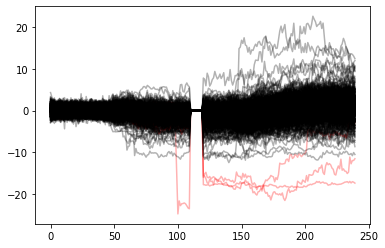

In [6]:
#getting snips
restricted_start, restricted_end, restricted_full = get_snips(restricted_dark)
dark_start, dark_end, dark_full = get_snips(adlib_dark)
light_start, light_end, light_full = get_snips(adlib_light)
sucralose_start, sucralose_end, sucralose_full = get_snips(adlib_sucralose)



In [7]:
def plot_shaded_error(data, color, ax):
    
    pre = 5
    post = 10
    mineventlength=8
    binlength=0.1

    eventbalance=[6,2]

    try:
        assert(eventbalance[0] + eventbalance[1] == mineventlength)
        early_t = eventbalance[0]
        late_t = eventbalance[1]
    except:
        print("No event balance given. Using default 50-50 split.")
        early_t = mineventlength/2
        late_t = mineventlength/2

    bins_early = int((pre + early_t) / binlength)
    bins_late = int((post + late_t) / binlength)

    # data1
    x1 = np.arange(0,bins_early)
    x2 = np.arange(data.shape[1] - bins_late, data.shape[1])

    mean = np.mean(data, axis=0)
    error_values = np.std(data, axis=0) / np.sqrt(len(data))

    ax.plot(x1, mean[:bins_early], color=color)
    ax.plot(x2, mean[-bins_late:], color=color)

    ax.fill_between(x1, mean[:bins_early]-error_values[:bins_early], 
                    mean[:bins_early]+error_values[:bins_early], 
                    color=color, alpha=0.3,
                    linewidth=0,
                    )
    ax.fill_between(x2, mean[-bins_late:]-error_values[-bins_late:], 
                    mean[-bins_late:]+error_values[-bins_late:], 
                    color=color, alpha=0.3,
                    linewidth=0
                    )
    

def make_snips_plot(data1, data2, color1, color2):
    
    f, ax =plt.subplots(figsize=[1.8,1.6],
                    gridspec_kw={
                                "hspace":0.3,
                                "left":0.16,
                                "right":0.98,
                                "top":0.98,
                                "bottom":0.02}
                    )



    # data2
    
    plot_shaded_error(data1, color1, ax)
    plot_shaded_error(data2, color2, ax)

    for spine in ["top", "right", "left", "bottom"]:
        ax.spines[spine].set_visible(False)

    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlim([0,240])

    transform = blended_transform_factory(ax.transData, ax.transAxes)
    ax.plot([190,240], [0.05, 0.05], linewidth=2, color="k", transform=transform)

    ax.plot([2,2], [-1, -2], linewidth=2, color="k")

    ax.axvline(50, color="k", linestyle="--", alpha=0.5)
    ax.axvline(140, color="k", linestyle="--", alpha=0.5)
    
    return f


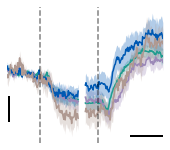

In [8]:
f, ax =plt.subplots(figsize=[2.8,2.5]
                )

plot_shaded_error(restricted_full, colors_restricted, ax)
plot_shaded_error(light_full, colors_adlib_light, ax)
plot_shaded_error(dark_full, colors_adlib_dark, ax)
plot_shaded_error(sucralose_full, colors_sucralose, ax)

for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)

ax.set_yticks([])
ax.set_xticks([])
ax.set_xlim([0,240])

transform = blended_transform_factory(ax.transData, ax.transAxes)
ax.plot([190,240], [0.05, 0.05], linewidth=2, color="k", transform=transform)

ax.plot([2,2], [-1, -2], linewidth=2, color="k")

ax.axvline(50, color="k", linestyle="--", alpha=0.5)
ax.axvline(140, color="k", linestyle="--", alpha=0.5)


#f.savefig(FIGSFOLDER / "PVH_all_snips.pdf")


In [9]:
epochs = {
    'baseline': (10, 50),
    'lick_early': (50, 110),
    'lick_late': (120, 140),
    'early_post': (140, 190),
    'late_post': (190, 240)
}

def calculate_auc_by_epoch(data, epochs):

    # Initialize results
    auc_baseline = []
    auc_lick_early = []
    auc_lick_late = []
    auc_early_post = []
    auc_late_post = []

    # Calculate AUCs for each snippet
    for snip in data:
        # Calculate AUC for each epoch and normalize
        baseline_auc = np.trapz(snip[epochs['baseline'][0]:epochs['baseline'][1]]) / (epochs['baseline'][1] - epochs['baseline'][0])
        lick_early_auc = np.trapz(snip[epochs['lick_early'][0]:epochs['lick_early'][1]]) / (epochs['lick_early'][1] - epochs['lick_early'][0])
        lick_late_auc = np.trapz(snip[epochs['lick_late'][0]:epochs['lick_late'][1]]) / (epochs['lick_late'][1] - epochs['lick_late'][0])
        early_post_auc = np.trapz(snip[epochs['early_post'][0]:epochs['early_post'][1]]) / (epochs['early_post'][1] - epochs['early_post'][0])
        late_post_auc = np.trapz(snip[epochs['late_post'][0]:epochs['late_post'][1]]) / (epochs['late_post'][1] - epochs['late_post'][0])
        
        # Append to respective lists
        auc_baseline.append(baseline_auc)
        auc_lick_early.append(lick_early_auc)
        auc_lick_late.append(lick_late_auc)
        auc_early_post.append(early_post_auc)
        auc_late_post.append(late_post_auc)
    
    return auc_baseline, auc_lick_early, auc_lick_late, auc_early_post, auc_late_post


In [10]:
restricted_baseline_AUC, restricted_early_lick_AUC, restricted_late_lick_AUC, restricted_early_post_AUC, restricted_late_post_AUC = calculate_auc_by_epoch(restricted_full, epochs)
light_baseline_AUC, light_early_lick_AUC, light_late_lick_AUC, light_early_post_AUC, light_late_post_AUC = calculate_auc_by_epoch(light_full, epochs)
dark_baseline_AUC, dark_early_lick_AUC, dark_late_lick_AUC, dark_early_post_AUC, dark_late_post_AUC = calculate_auc_by_epoch(dark_full, epochs)
sucralose_baseline_AUC, sucralose_early_lick_AUC, sucralose_late_lick_AUC, sucralose_early_post_AUC, sucralose_late_post_AUC = calculate_auc_by_epoch(sucralose_full, epochs)

In [37]:
def make_AUC_plot(restricted, light, dark, sucralose):

    f, ax = plt.subplots(figsize=[1, 1])  
    
    tp.barscatter([restricted, light, dark, sucralose],
              barfacecolor=[colors_restricted, colors_adlib_light, colors_adlib_dark, colors_sucralose],
              barfacecolor_option="individual",
              baredgecolor=[colors_restricted, colors_adlib_light, colors_adlib_dark, colors_sucralose],
              baredgecolor_option="individual",
              scattersize=20,
              scatteralpha=0.6,
              scatterlinecolor= "grey",
              ax=ax)
    
    ax.set_yticks([-6, -3, 0, 3])
    ax.set_ylim([-6, 4])
    ax.set_yticklabels([])
    
    for spine in ["top", "right", "bottom"]:
        ax.spines[spine].set_visible(False)
    
    return f  

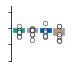

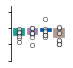

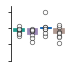

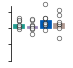

In [38]:
f = make_AUC_plot(restricted_early_lick_AUC, light_early_lick_AUC, dark_early_lick_AUC, sucralose_early_lick_AUC)
f.savefig(FIGSFOLDER / "PVH_AUC_early_lick_epoch_2.pdf")

f = make_AUC_plot(restricted_late_lick_AUC, light_late_lick_AUC, dark_late_lick_AUC, sucralose_late_lick_AUC)
f.savefig(FIGSFOLDER / "PVH_AUC_late_lick_epoch_2.pdf")

f = make_AUC_plot(restricted_early_post_AUC, light_early_post_AUC, dark_early_post_AUC, sucralose_early_post_AUC)
f.savefig(FIGSFOLDER / "PVH_AUC_early_post_epoch_2.pdf")

f = make_AUC_plot(restricted_late_post_AUC, light_late_post_AUC, dark_late_post_AUC, sucralose_late_post_AUC)
f.savefig(FIGSFOLDER / "PVH_AUC_late_post_epoch_2.pdf")